## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df=pd.read_csv("QueryResults.csv",names=["DATE","TAG","POSTS"],header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2896,2025-12-01 00:00:00,php,69
2897,2025-12-01 00:00:00,python,442
2898,2025-12-01 00:00:00,r,100
2899,2025-12-01 00:00:00,ruby,8
2900,2025-12-01 00:00:00,swift,88


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2901, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2901
TAG      2901
POSTS    2901
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby("TAG").sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45191
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,408267
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1623556
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,814918
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52552
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74466
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1917564
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2526165
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68315


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,209,209
c,209,209
c#,210,210
c++,209,209
delphi,209,209
go,194,194
java,209,209
javascript,209,209
perl,209,209


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [10]:
type(df["DATE"][1])

str

In [11]:
print(pd.to_datetime(df["DATE"][1]))
print(type(pd.to_datetime(df["DATE"][1])))

2008-08-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [13]:
df.pivot(index="DATE",columns="TAG",values="POSTS")

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1637.0,751.0,104.0,NaN,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1142.0,720.0,128.0,603.0,504.0,NaN,245.0,NaN
2008-11-01,16.0,257.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,22.0,120.0,320.0,294.0,34.0,40.0,274.0,287.0,5.0,86.0,715.0,158.0,17.0,89.0
2025-09-01,22.0,124.0,285.0,248.0,22.0,34.0,297.0,288.0,9.0,110.0,683.0,150.0,13.0,122.0
2025-10-01,41.0,120.0,285.0,231.0,22.0,32.0,262.0,266.0,7.0,93.0,650.0,182.0,10.0,130.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
reshaped_df=df.pivot(index="DATE",columns="TAG",values="POSTS")

In [15]:
reshaped_df.shape

(210, 14)

In [16]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [17]:
reshaped_df.count()

TAG
assembly      209
c             209
c#            210
c++           209
delphi        209
go            194
java          209
javascript    209
perl          209
php           209
python        209
r             207
ruby          209
swift         200
dtype: int64

In [18]:
reshaped_df.fillna(0,inplace=True)

In [19]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1637.0,751.0,104.0,0.0,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1982.0,804.0,112.0,0.0,1142.0,720.0,128.0,603.0,504.0,0.0,245.0,0.0
2008-11-01,16.0,257.0,1728.0,733.0,139.0,0.0,951.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,22.0,120.0,320.0,294.0,34.0,40.0,274.0,287.0,5.0,86.0,715.0,158.0,17.0,89.0
2025-09-01,22.0,124.0,285.0,248.0,22.0,34.0,297.0,288.0,9.0,110.0,683.0,150.0,13.0,122.0
2025-10-01,41.0,120.0,285.0,231.0,22.0,32.0,262.0,266.0,7.0,93.0,650.0,182.0,10.0,130.0


In [20]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


In [21]:
import matplotlib.pyplot as plt

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

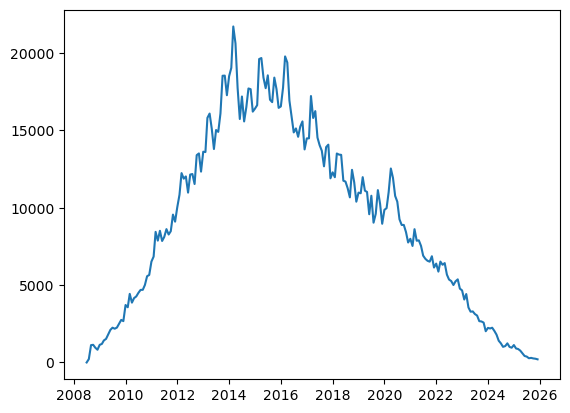

In [22]:
plt.plot(reshaped_df.index,reshaped_df["java"])

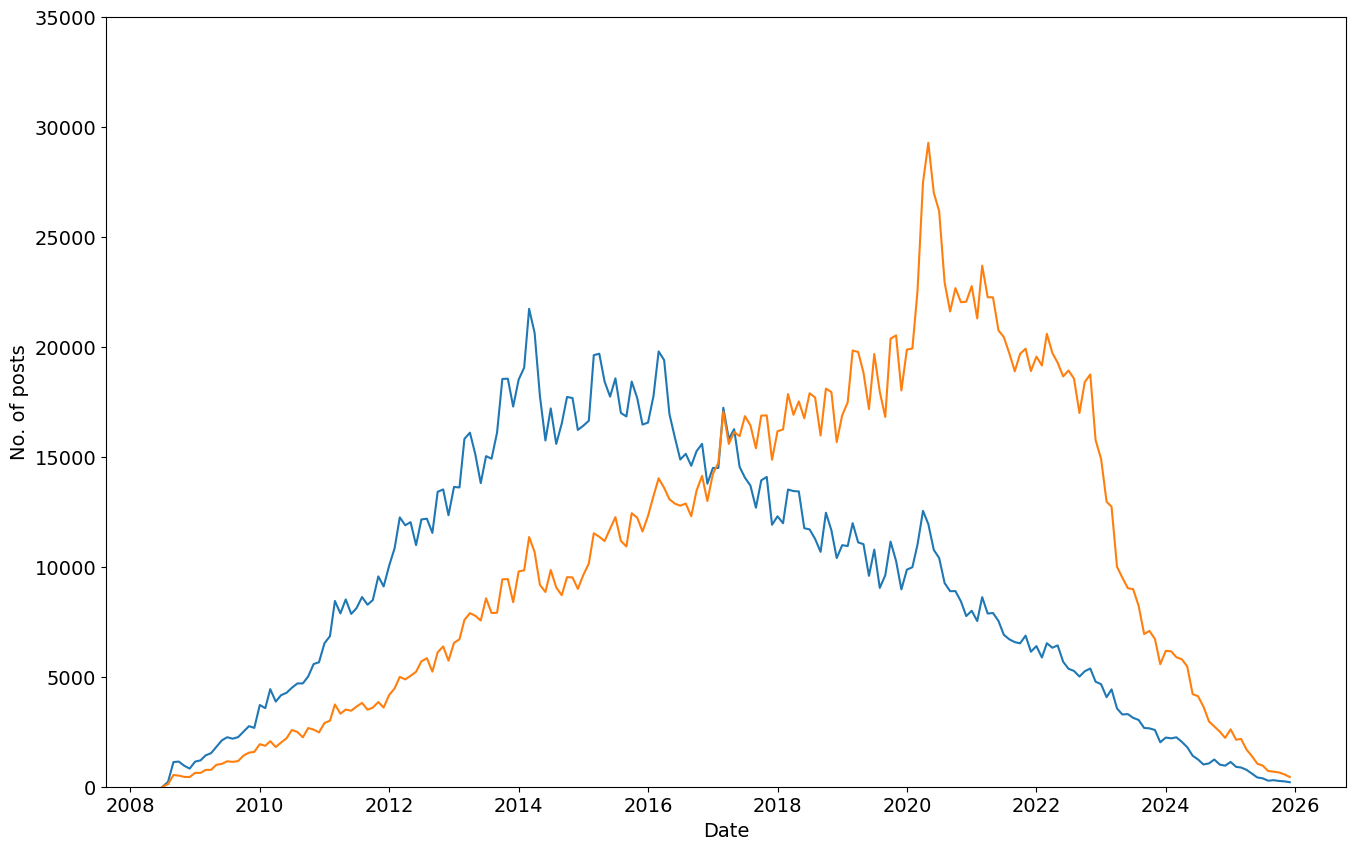

In [23]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of posts",fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df["java"])
plt.plot(reshaped_df.index,reshaped_df["python"])

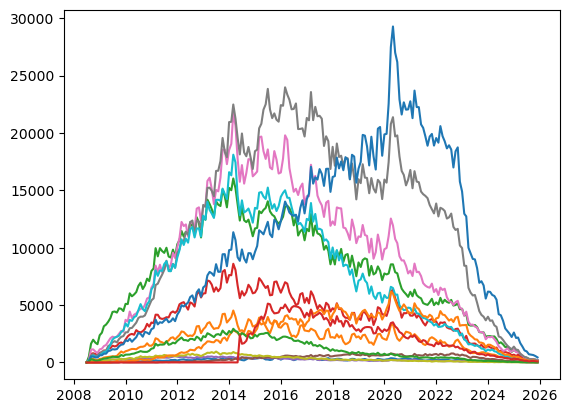

In [24]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column])

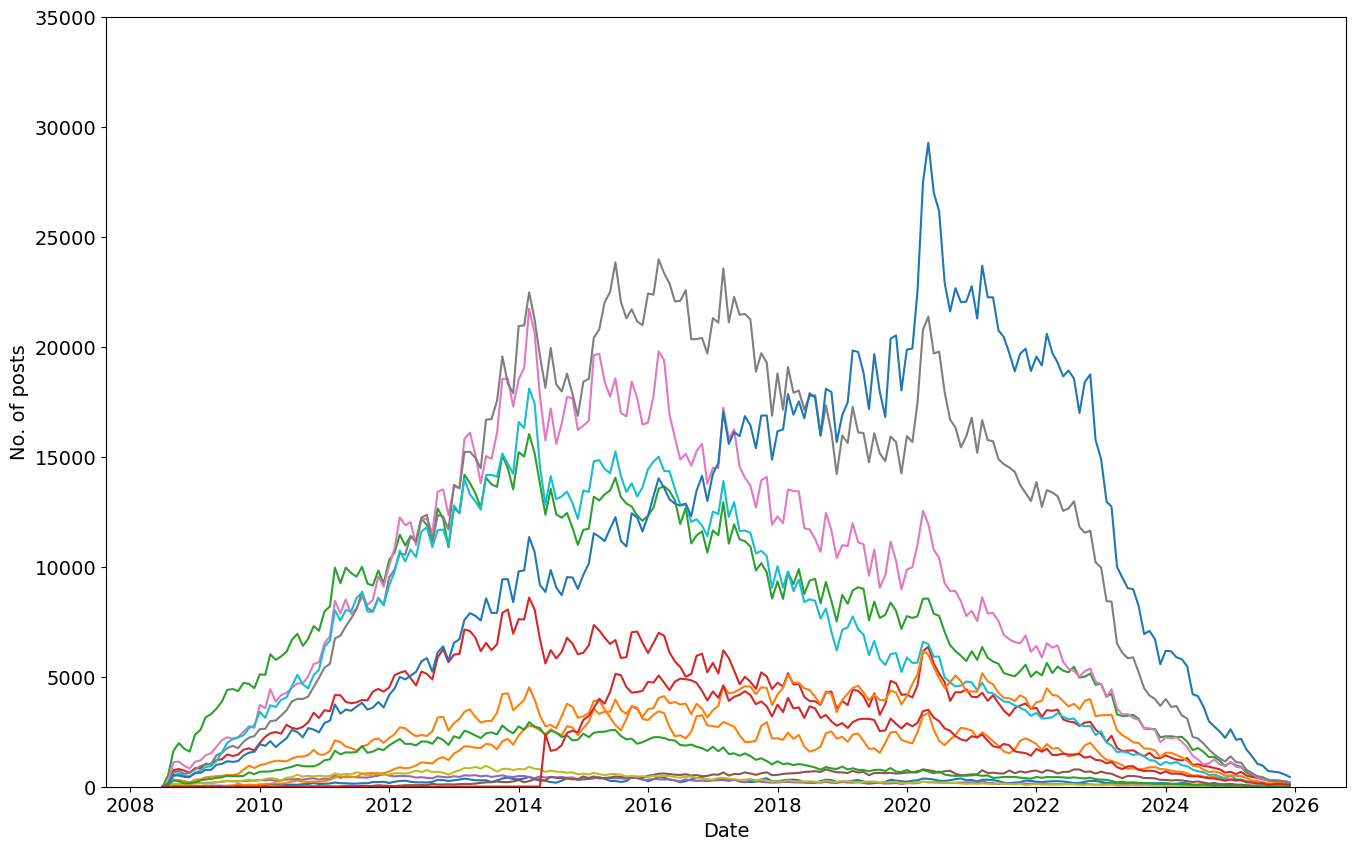

In [25]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of posts",fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

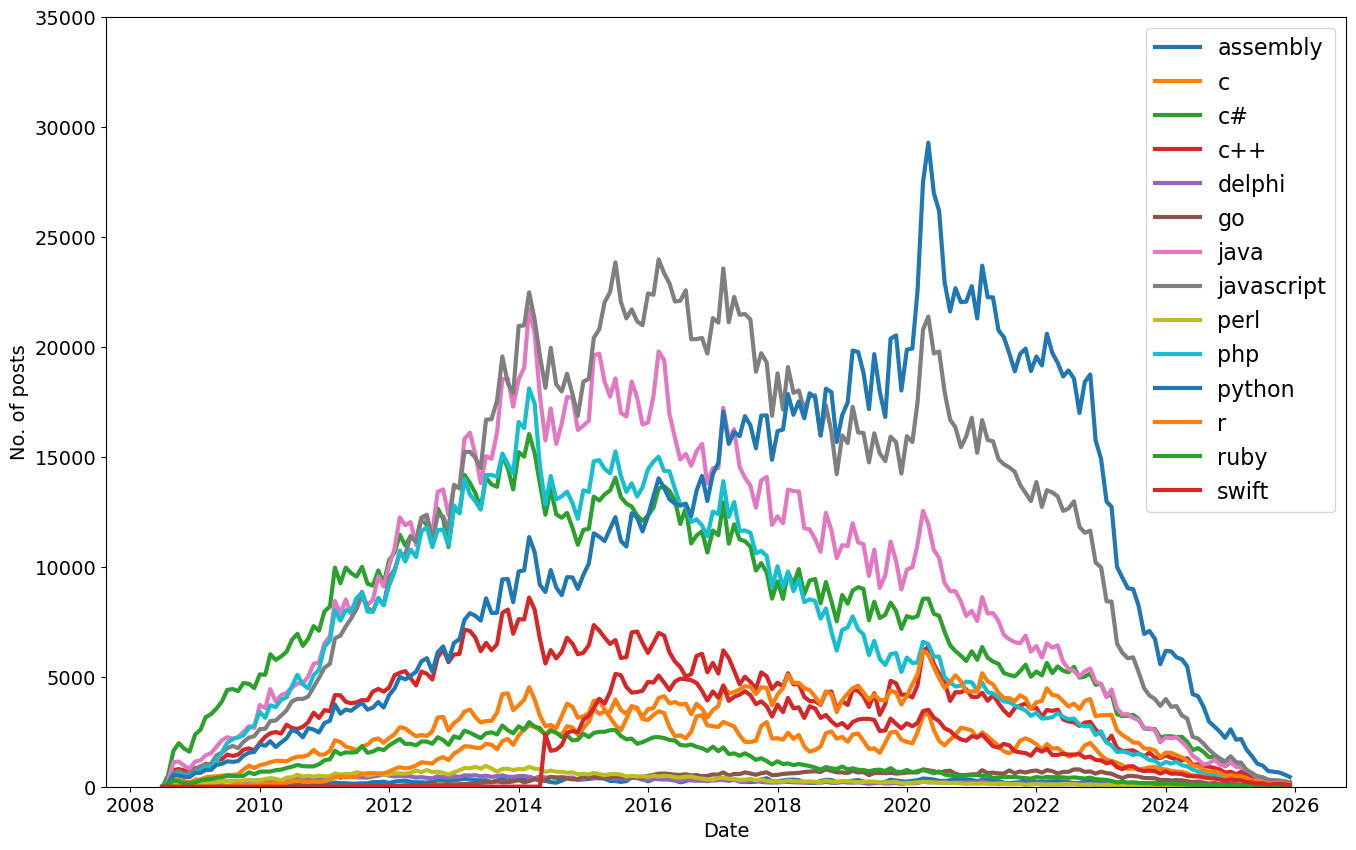

In [26]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of posts",fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],linewidth=3,label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

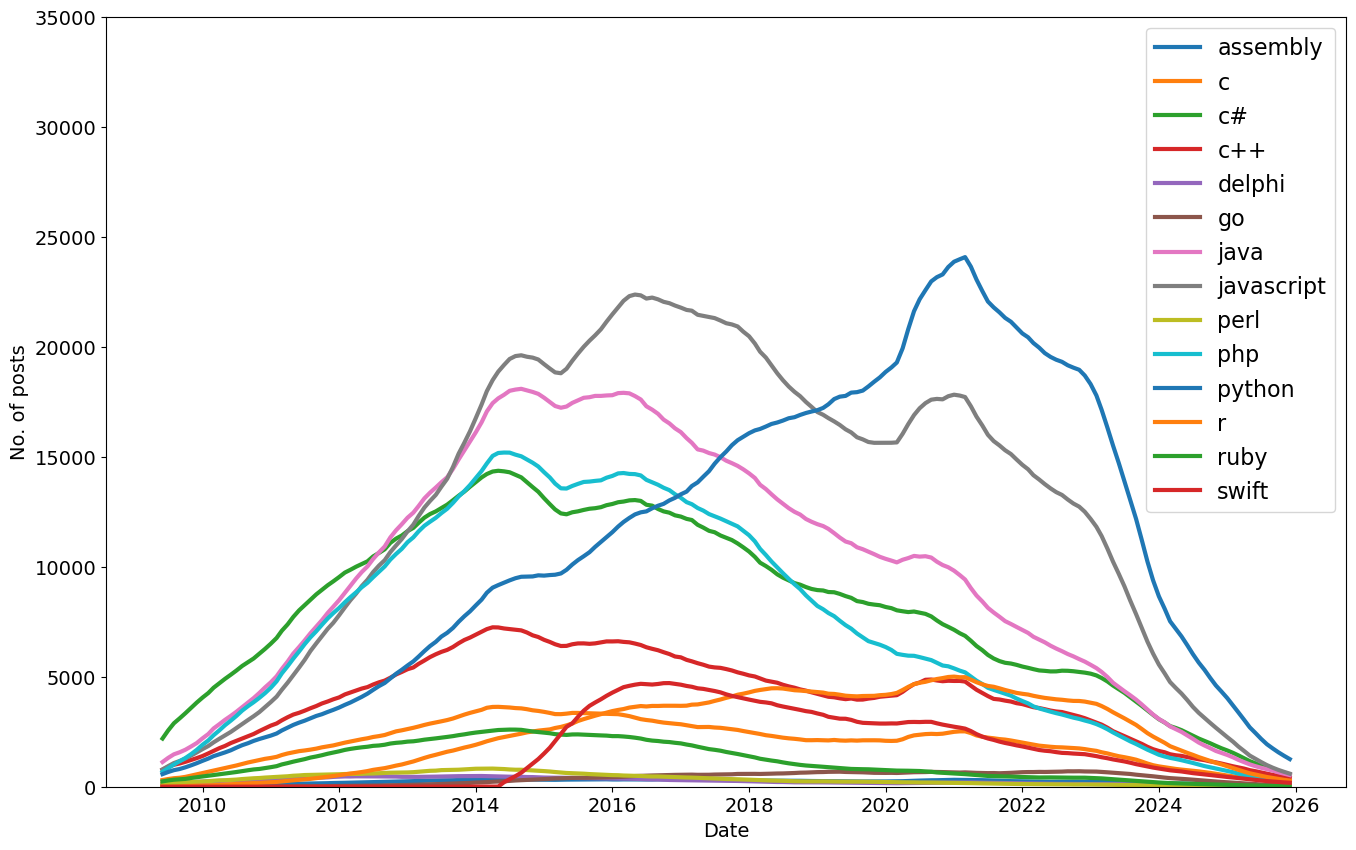

In [34]:
roll_df=reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of posts",fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column],linewidth=3,label=roll_df[column].name)
plt.legend(fontsize=16)